In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

# dataset

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
dat=iris.data
label=iris.target

In [3]:
pd.DataFrame(dat,columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
pd.DataFrame(dat,columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
print("label: ",label)
print("サンプル数: ",len(label))
print("label名: ",iris.target_names)

label:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
サンプル数:  150
label名:  ['setosa' 'versicolor' 'virginica']


# sklearnの基本

## 基本は
- `<model>`=`<algorism>`()       : 分類機のインスタンスを作る
- `<model>`.fit(feature,label) : 分類機でフィッティングを行う
- `<model>`.predict(feature)   : できた予測モデルで予測を行う 

## SVMの場合

In [6]:
from sklearn.svm import SVC
clf_svc=SVC(probability=True)

> sklearnのSVMはSVC(support vector classfier)とSVR(support vector regression)の２つで分かれている

> svcはprobabilityをTrueにしなければスコアが計算できない

In [7]:
clf_svc.fit(dat[:-5],label[:-5])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
clf_svc.predict(dat[-5:])

array([2, 2, 2, 2, 2])

In [9]:
score_svc=clf_svc.predict_proba(dat[-5:])
pd.DataFrame(score_svc,columns=iris.target_names)

,setosa,versicolor,virginica
0,0.010819,0.018678,0.970503
1,0.011313,0.086455,0.902232
2,0.009774,0.045654,0.944572
3,0.012336,0.008320,0.979343
4,0.010601,0.087593,0.901806


In [26]:
clf_svc.decision_function(dat[-5:])

/usr/local/bin/.pyenv/versions/miniconda3-3.18.3/lib/python3.5/site-packages/sklearn/svm/base.py:547: ChangedBehaviorWarning: The decision_function_shape default value will change from 'ovo' to 'ovr' in 0.18. This will change the shape of the decision function returned by SVC.
  "SVC.", ChangedBehaviorWarning)


array([[-0.79639556, -1.04283042, -1.11385773],
       [-0.96425259, -1.04845737, -0.62251252],
       [-0.89711556, -1.06998162, -0.82900464],
       [-0.70129115, -1.01363239, -1.38405326],
       [-0.95411152, -1.07400913, -0.61822862]])

# RFの場合

In [10]:
from sklearn.ensemble import RandomForestClassifier as RFC
clf_rfc=RFC()

In [11]:
clf_rfc.fit(dat[:-5],label[:-5])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
clf_rfc.predict(dat[-5:])

array([2, 2, 2, 2, 2])

In [13]:
clf_rfc.predict_proba(dat[-5:])

array([[ 0. ,  0.1,  0.9],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.1,  0.9],
       [ 0. ,  0.1,  0.9]])

## **sklearn準拠のモデルであれば、APIが共通なため同じ操作で予測モデルが作れるのが特徴**
sklearn準拠の話は[この辺](http://yamaguchiyuto.hatenablog.com/entry/python-advent-calendar-2014)参照

# 線形回帰の例

In [14]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
dat_train=diabetes.data[:-20]
target_train=diabetes.target[:-20]
dat_test=diabetes.data[-20:]
target_test=diabetes.target[-20:]

In [15]:
pd.DataFrame(dat_train).head() # 記述子は10個の検査値

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [16]:
pd.DataFrame(target_train).head() # 被説明変数は１年後の血糖値

,0
0,151
1,75
2,141
3,206
4,135


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg=LinearRegression()
reg.fit(dat_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
reg.predict(dat_test)

array([ 197.61846908,  155.43979328,  172.88665147,  111.53537279,
        164.80054784,  131.06954875,  259.12237761,  100.47935157,
        117.0601052 ,  124.30503555,  218.36632793,   61.19831284,
        132.25046751,  120.3332925 ,   52.54458691,  194.03798088,
        102.57139702,  123.56604987,  211.0346317 ,   52.60335674])

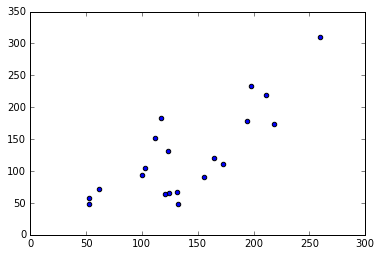

In [20]:
plt.scatter(reg.predict(dat_test),target_test)

## **回帰の場合も基本的には一緒**